In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
datagen = train_datagen.flow_from_directory('C:/Users/anhna/PycharmProjects/NLP/data/extracted_images', target_size=(64, 64), batch_size=32, class_mode='categorical',color_mode='grayscale')

Found 245419 images belonging to 40 classes.


In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    'C:/Users/anhna/PycharmProjects/NLP/data/extracted_images',
    target_size=(45, 45),
    batch_size=64,class_mode='categorical',color_mode='grayscale',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/anhna/PycharmProjects/NLP/data/extracted_images',
    target_size=(45, 45),
    batch_size=64,class_mode='categorical',color_mode='grayscale',
    subset='validation') # set as validation data

Found 196352 images belonging to 40 classes.
Found 49067 images belonging to 40 classes.


In [48]:
cnn = tf.keras.models.Sequential()

In [49]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[45,45,1]))

In [50]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

In [51]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

In [52]:
cnn.add(tf.keras.layers.Flatten())

In [53]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [54]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [55]:
cnn.add(tf.keras.layers.Dense(units=40,activation='sigmoid'))

In [56]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
cnn.fit(x=train_generator ,validation_data=validation_generator,epochs=10)

Epoch 1/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 102s 33ms/step - accuracy: 0.7870 - loss: 0.0378 - val_accuracy: 0.9608 - val_loss: 0.0067
Epoch 2/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.9650 - loss: 0.0061 - val_accuracy: 0.9771 - val_loss: 0.0040
Epoch 3/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 90s 29ms/step - accuracy: 0.9768 - loss: 0.0040 - val_accuracy: 0.9808 - val_loss: 0.0033
Epoch 4/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 90s 29ms/step - accuracy: 0.9831 - loss: 0.0029 - val_accuracy: 0.9850 - val_loss: 0.0027
Epoch 5/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 90s 29ms/step - accuracy: 0.9872 - loss: 0.0022 - val_accuracy: 0.9874 - val_loss: 0.0023
Epoch 6/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.9898 - loss: 0.0018 - val_accuracy: 0.9919 - val_loss: 0.0014
Epoch 7/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.9921 - loss: 0.0013 - val_accuracy: 0.9911 - val_loss: 0.0019
Epoch 8/10
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 90s 29ms/step - accuracy: 0.9932 

In [58]:
cnn.save('mnist_cnn_model.keras')

In [59]:
class CircleModelV0(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = torch.nn.Linear(in_features=2,out_features=10)
        self.layer_2 = torch.nn.Linear(in_features=10,out_features=10)
        self.layer_3 = torch.nn.Linear(in_features=10,out_features=1)
        self.ReLu = torch.nn.ReLU()
    def forward(self,x):
        return self.layer_3(self.ReLu(self.layer_2(self.ReLu(self.layer_1(x)))))
        

NameError: name 'torch' is not defined

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Generate sine wave data
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        x = np.linspace(i * 2 * np.pi, (i + 1) * 2 * np.pi, seq_length + 1)
        sine_wave = np.sin(x)
        X.append(sine_wave[:-1])  # input sequence
        y.append(sine_wave[1:])   # target sequence
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
X, y = generate_data(seq_length, num_samples)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

print(X.shape, y.shape)  # Output: (1000, 50), (1000, 50)

torch.Size([1000, 50]) torch.Size([1000, 50])


In [18]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

input_size = 1
hidden_size = 20
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

In [20]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))  # Add a dimension for input size
    loss = criterion(outputs, y.unsqueeze(2))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.5194
Epoch [20/100], Loss: 0.4523
Epoch [30/100], Loss: 0.3863
Epoch [40/100], Loss: 0.3028
Epoch [50/100], Loss: 0.1818
Epoch [60/100], Loss: 0.0955
Epoch [70/100], Loss: 0.0628
Epoch [80/100], Loss: 0.0420
Epoch [90/100], Loss: 0.0249
Epoch [100/100], Loss: 0.0140


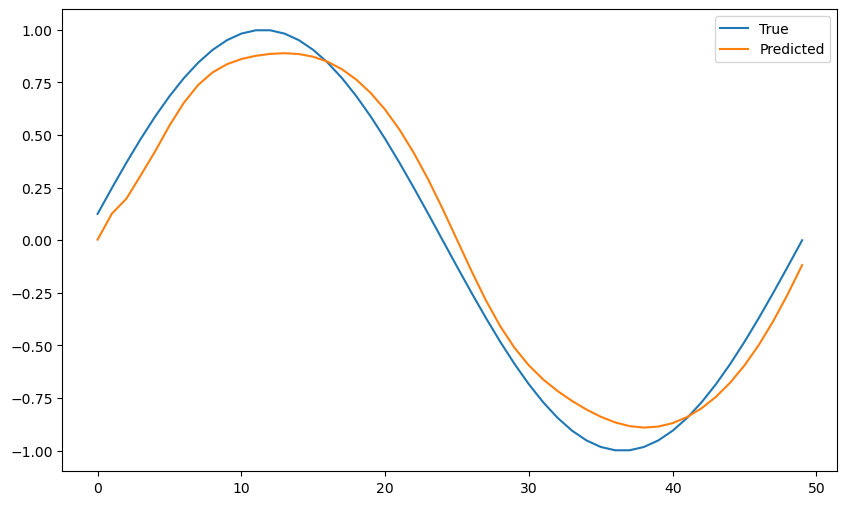

In [21]:
# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y[0].numpy(), label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.show()

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

input_size = 1
hidden_size = 20
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

In [1]:
from collections import Counter
 
# This is going to be the dummy sentence :
sentences = "this is the second example showing for the article at gfg. and doing this is actually really fun"
 
words = sentences.split(' ')
 
# create a dictionary
vocab = Counter(words) 
vocab = sorted(vocab, key=vocab.get, reverse=True)
vocab_size = len(vocab)
 
# create a word to index dictionary from our Vocab dictionary
word2idx = {word: ind for ind, word in enumerate(vocab)} 
 
encoded_sentences = [word2idx[word] for word in words]
 
# assign a value to your embedding_dim
e_dim = 5

In [2]:
encoded_sentences

[0, 1, 2, 3, 4, 5, 6, 2, 7, 8, 9, 10, 11, 0, 1, 12, 13, 14]

In [5]:
from torch import nn
# initialise an Embedding layer from Torch
emb = nn.Embedding(vocab_size, e_dim, padding_idx = 3)
word_vectors = emb(torch.LongTensor(encoded_sentences))
 
#print the word_vectors
print(word_vectors)

tensor([[ 1.3165,  0.8127,  0.9349, -2.0551,  0.1578],
        [ 0.8104,  0.8225,  0.5760,  0.6371,  1.7113],
        [-1.6016,  0.8552, -1.0237,  0.3824, -0.7874],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.9700, -0.3235, -0.9591,  0.8140, -0.0718],
        [ 1.3179, -0.3086, -2.8812, -0.3724, -1.6654],
        [ 0.8589,  1.1203,  0.4415,  1.5596,  1.6780],
        [-1.6016,  0.8552, -1.0237,  0.3824, -0.7874],
        [ 0.7354,  1.0138, -0.5083,  0.8259,  0.3755],
        [ 0.4732, -1.0635, -0.2287,  1.5396, -1.6309],
        [ 1.1197, -0.7001,  1.8169,  0.0563, -2.1806],
        [-0.0561,  0.8642,  1.1352,  0.9351,  0.6343],
        [ 0.4777, -0.1249,  0.8795,  0.0645,  0.5804],
        [ 1.3165,  0.8127,  0.9349, -2.0551,  0.1578],
        [ 0.8104,  0.8225,  0.5760,  0.6371,  1.7113],
        [-0.2193,  0.5323,  0.2457,  0.1456,  0.4586],
        [ 0.0333,  0.4623, -0.6215, -0.5907, -0.8914],
        [ 0.8838,  0.2715,  0.1835,  0.3987,  0.5923]],
       gr